# Data visualization_v8

In [61]:
import pandas as pd
import numpy as np
import datetime as dt

In [62]:
import matplotlib.pyplot as plt
import yfinance as yf

In [63]:
data = yf.download('^HSI','2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [64]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,25824.439453,25824.439453,25055.269531,25130.349609,25130.349609,1666316400
2019-01-03,25077.679688,25262.210938,24896.869141,25064.359375,25064.359375,1481291700
2019-01-04,24946.119141,25626.029297,24924.730469,25626.029297,25626.029297,1708572100
2019-01-07,26015.839844,26043.640625,25753.460938,25835.699219,25835.699219,1447090300
2019-01-08,25852.500000,25960.890625,25688.500000,25875.449219,25875.449219,1578205700


In [65]:
data["Date"]=data.index

In [66]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-01-02,25824.439453,25824.439453,25055.269531,25130.349609,25130.349609,1666316400,2019-01-02
2019-01-03,25077.679688,25262.210938,24896.869141,25064.359375,25064.359375,1481291700,2019-01-03
2019-01-04,24946.119141,25626.029297,24924.730469,25626.029297,25626.029297,1708572100,2019-01-04
2019-01-07,26015.839844,26043.640625,25753.460938,25835.699219,25835.699219,1447090300,2019-01-07
2019-01-08,25852.500000,25960.890625,25688.500000,25875.449219,25875.449219,1578205700,2019-01-08


In [67]:
data=data[["Date","Open","High","Low","Close","Volume"]]

In [68]:
data.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2019-01-02,2019-01-02,25824.439453,25824.439453,25055.269531,25130.349609,1666316400
2019-01-03,2019-01-03,25077.679688,25262.210938,24896.869141,25064.359375,1481291700
2019-01-04,2019-01-04,24946.119141,25626.029297,24924.730469,25626.029297,1708572100
2019-01-07,2019-01-07,26015.839844,26043.640625,25753.460938,25835.699219,1447090300
2019-01-08,2019-01-08,25852.500000,25960.890625,25688.500000,25875.449219,1578205700


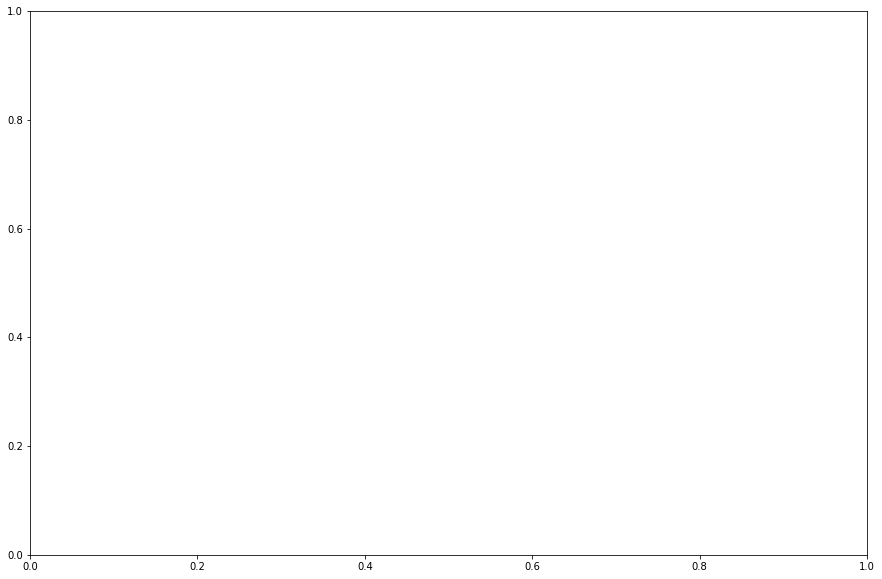

In [69]:
f1, ax = plt.subplots(figsize = (15,10))

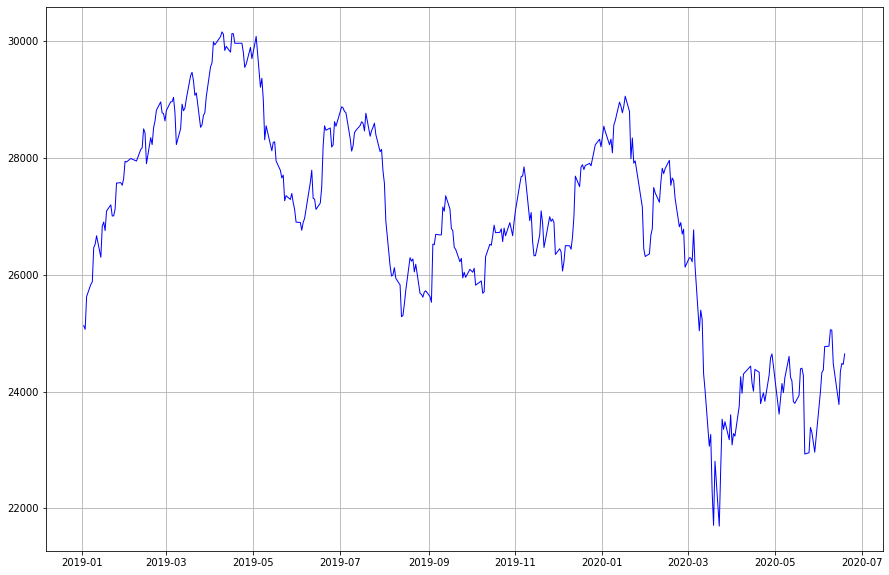

In [70]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax.grid(True)
plt.show()

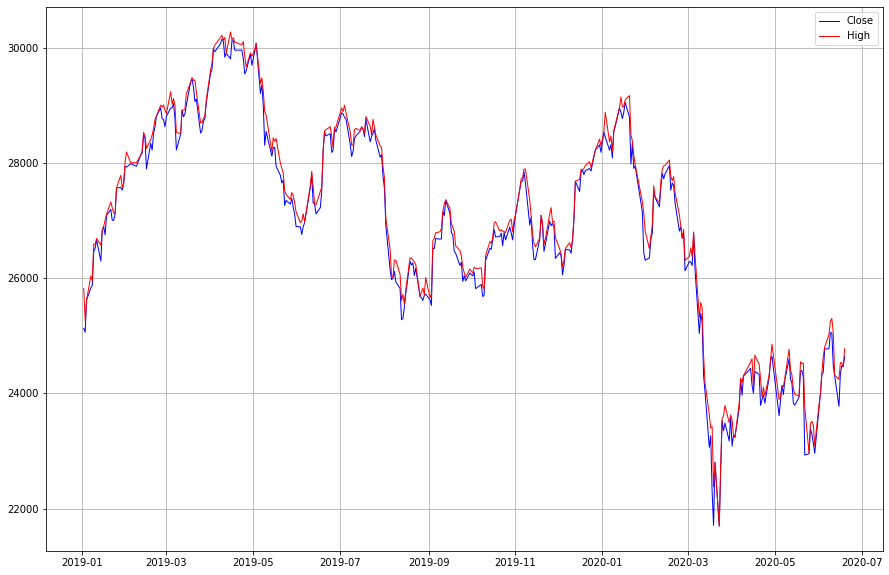

In [71]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax.plot(data["Date"],data["High"],color="red",label="High",linewidth=1)
ax.grid(True)
ax.legend()
plt.show()

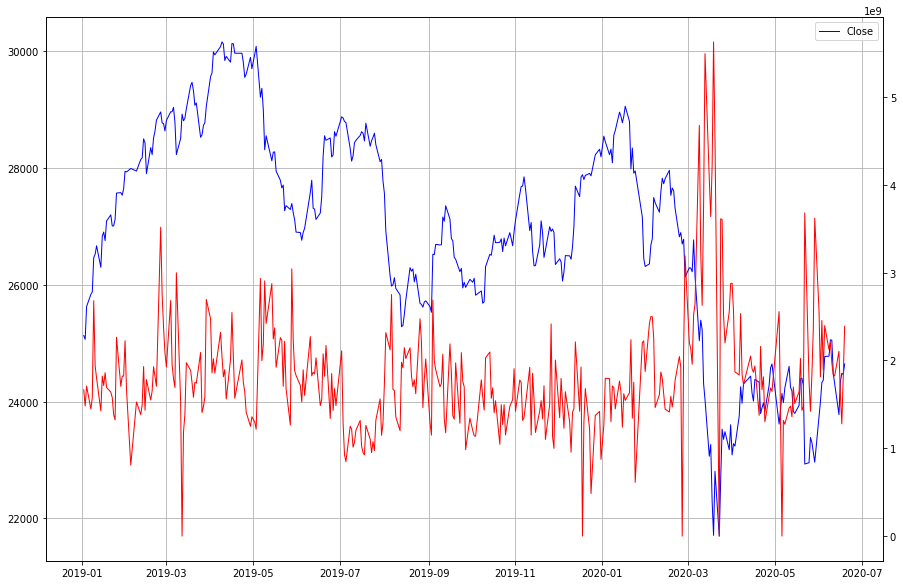

In [72]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax1=ax.twinx()
ax1.plot(data["Date"],data["Volume"],color="red",label="Volume",linewidth=1)
ax.grid(True)
ax.legend()
plt.show()

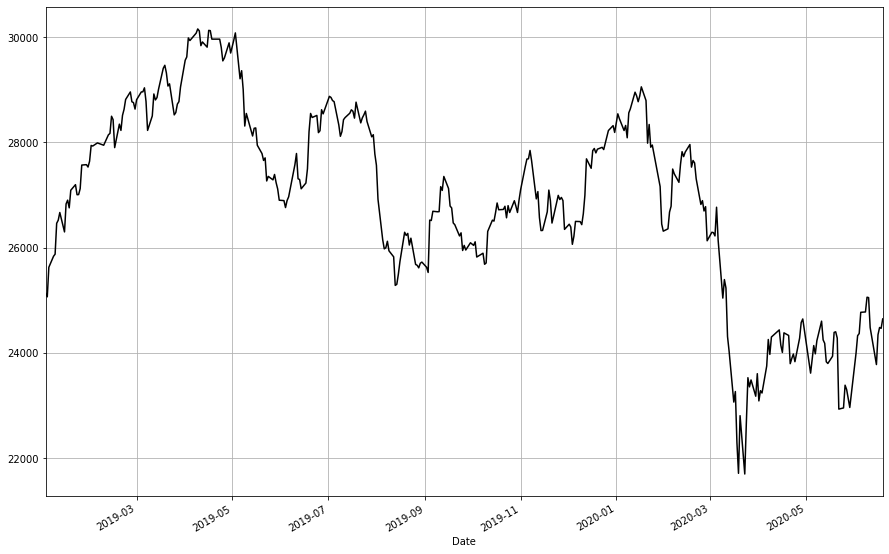

In [73]:
f1, ax1 = plt.subplots(figsize = (15,10))
data["Close"].plot(kind="line",ax=ax1,color="black",label="Close",grid=True)
plt.show()

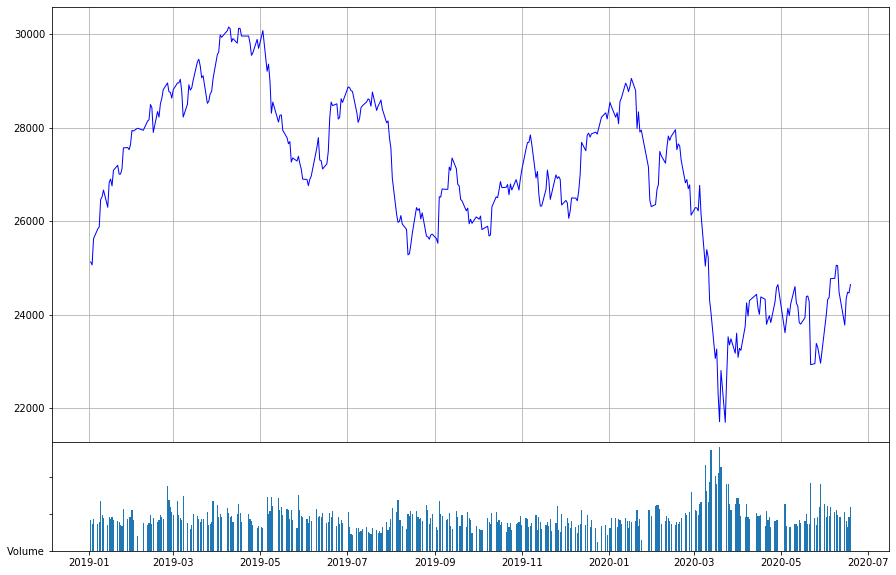

In [74]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((5,4), (0,0), rowspan=4, colspan=4)

ax1.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax1.grid(True)
ax1v = plt.subplot2grid((5,4), (4,0), sharex=ax1, rowspan=1, colspan=4)


ax1v.axes.yaxis.set_ticklabels(["Volume"])
#ax1v.grid(False)
#ax1v.set_ylim(0, data["Volume"].max())
plt.setp(ax1.get_xticklabels(), visible=False)
ax1v.bar(data["Date"],data["Volume"])
plt.subplots_adjust(hspace=0)
#ax1.legend(loc="upper left")

plt.show()

## Exercise

In [75]:
data["Return"]=data["Close"]-data["Open"]

In [76]:
data["GAP"]=data["Open"]-data["Close"].shift()

In [77]:
data["GAP"].describe()

count     361.000000
mean       -6.817304
std       256.554710
min     -1789.750000
25%      -118.240234
50%        18.580078
75%       128.160156
max       801.439453
Name: GAP, dtype: float64

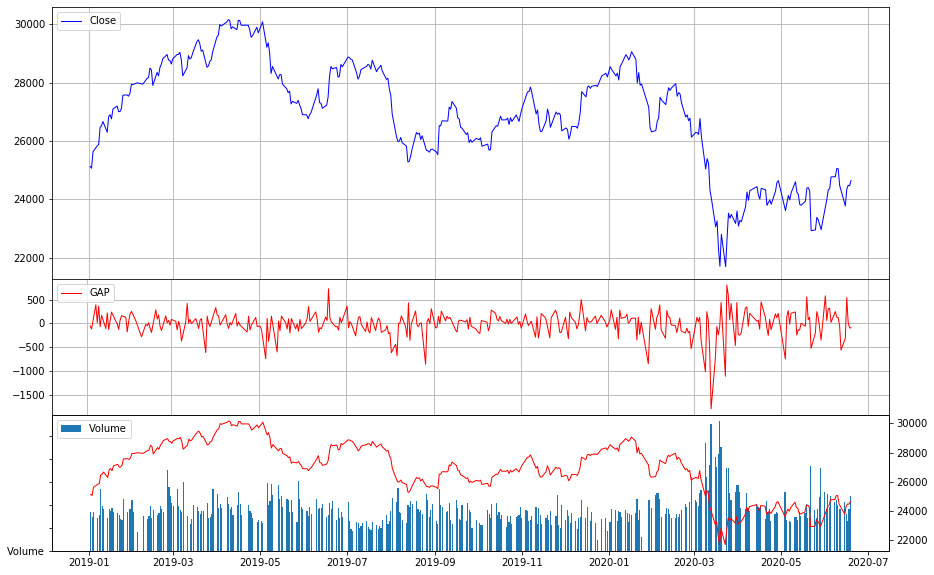

In [78]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((4,1), (0,0), rowspan=2, colspan=1)
ax1.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax1.grid(True)

ax1r = plt.subplot2grid((4,1), (2,0), rowspan=1, colspan=1)
ax1r.plot(data["Date"],data["GAP"],color="red",label="GAP",linewidth=1)
ax1r.grid(True)

ax1v = plt.subplot2grid((4,1), (3,0), rowspan=1, colspan=1)
ax1v.axes.yaxis.set_ticklabels(["Volume"])
ax1v.grid(False)
#ax1v.set_ylim(0, data["Volume"].max())
ax1v.bar(data["Date"],data["Volume"],label="Volume")
ax2=ax1v.twinx()
ax2.plot(data["Date"],data["Close"],color="red",label="Close",linewidth=1)

plt.subplots_adjust(hspace=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1r.get_xticklabels(), visible=False)
ax1.legend(loc="upper left")
ax1r.legend(loc="upper left")
ax1v.legend(loc="upper left")

plt.show()

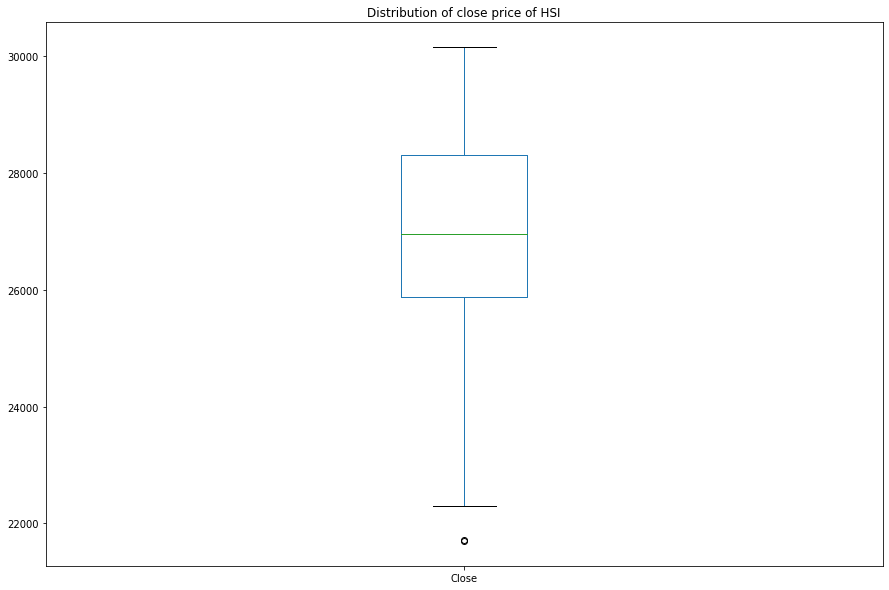

In [79]:
data["Close"].plot(kind="box",title="Distribution of close price of HSI",figsize=(15,10))
plt.show()

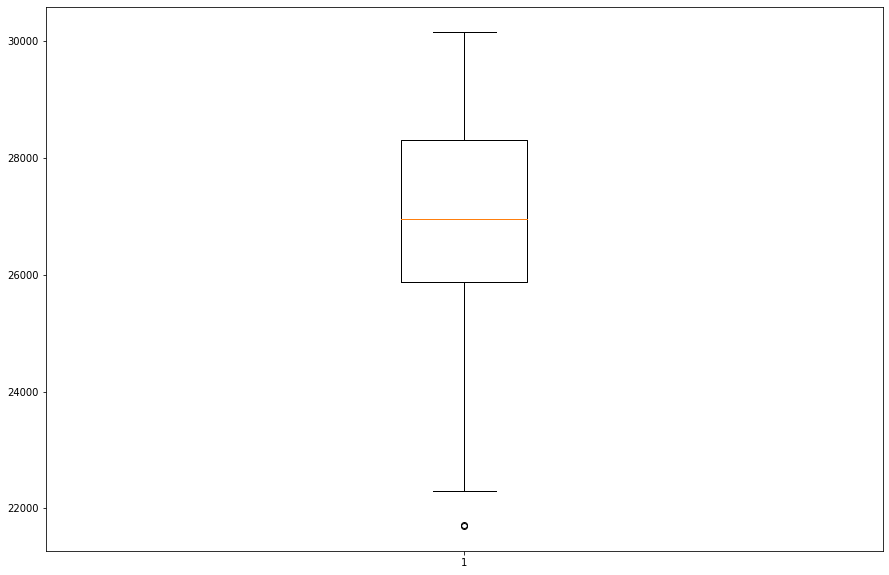

In [80]:
f1, ax = plt.subplots(figsize = (15,10))
ax.boxplot(data["Close"])
plt.show()

## Use case: To measure the volatity of the close price 

In [81]:
data["Close"].pct_change().head()

Date
2019-01-02         NaN
2019-01-03   -0.002626
2019-01-04    0.022409
2019-01-07    0.008182
2019-01-08    0.001539
Name: Close, dtype: float64

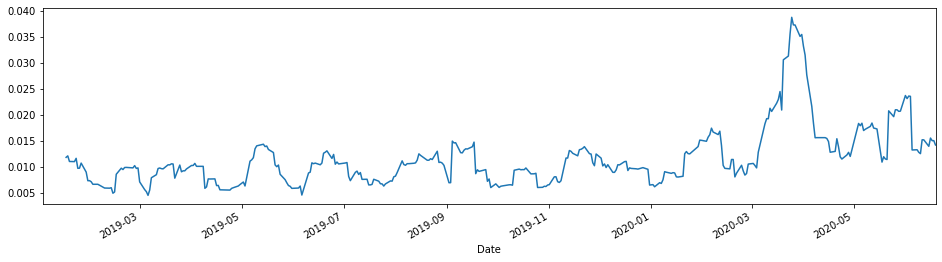

In [82]:
data["Close"].pct_change().rolling(window=10).std().plot(figsize=(16,4))
plt.show()

In [83]:
data["Volatity"]=data["Close"].pct_change().rolling(window=10).std()

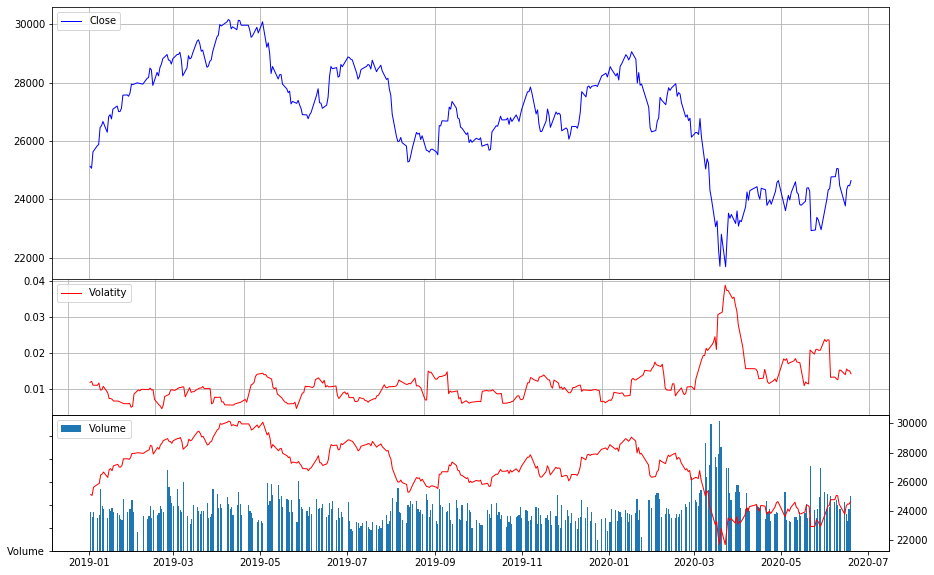

In [84]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((4,1), (0,0), rowspan=2, colspan=1)
ax1.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
ax1.grid(True)

ax1r = plt.subplot2grid((4,1), (2,0), rowspan=1, colspan=1)
ax1r.plot(data["Date"],data["Volatity"],color="red",label="Volatity",linewidth=1)
ax1r.grid(True)

ax1v = plt.subplot2grid((4,1), (3,0), rowspan=1, colspan=1)
ax1v.axes.yaxis.set_ticklabels(["Volume"])
ax1v.grid(False)
#ax1v.set_ylim(0, data["Volume"].max())
ax1v.bar(data["Date"],data["Volume"],label="Volume")
ax2=ax1v.twinx()
ax2.plot(data["Date"],data["Close"],color="red",label="Close",linewidth=1)

plt.subplots_adjust(hspace=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1r.get_xticklabels(), visible=False)
ax1.legend(loc="upper left")
ax1r.legend(loc="upper left")
ax1v.legend(loc="upper left")

plt.show()

## Exercise

In [85]:
df_HSI=yf.download("^HSI","2019-01-01")
df_0700HK=yf.download("0700.HK","2019-01-01")
df_0939HK=yf.download("0939.HK","2019-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


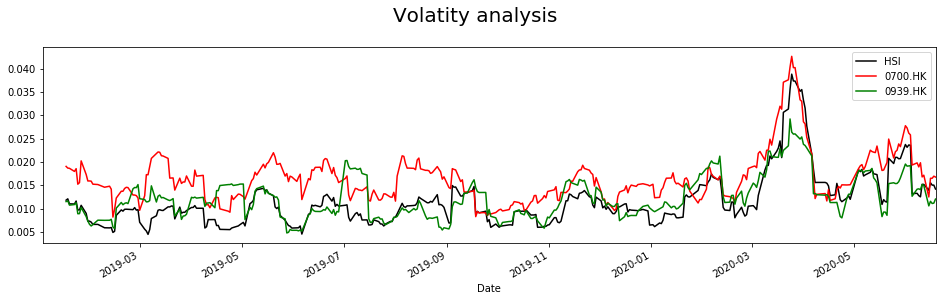

In [86]:
fig, ax1 = plt.subplots(1, 1, figsize=(16,4))
fig.suptitle('Volatity analysis', size=20, y=1.02)
df_HSI["Close"].pct_change().rolling(window=10).std().plot(kind='line',color="black", ax=ax1,label="HSI")
df_0700HK["Close"].pct_change().rolling(window=10).std().plot(kind='line',color="red", ax=ax1,label="0700.HK")
df_0939HK["Close"].pct_change().rolling(window=10).std().plot(kind='line',color="green",ax=ax1,label="0939.HK")

ax1.legend()
plt.show()

## Generate candlestick charts

In [87]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
%matplotlib inline

In [88]:
ohlc= data[['Date', 'Open', 'High', 'Low','Close',"Volume"]].copy()
ohlc.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2019-01-02,2019-01-02,25824.439453,25824.439453,25055.269531,25130.349609,1666316400
2019-01-03,2019-01-03,25077.679688,25262.210938,24896.869141,25064.359375,1481291700
2019-01-04,2019-01-04,24946.119141,25626.029297,24924.730469,25626.029297,1708572100
2019-01-07,2019-01-07,26015.839844,26043.640625,25753.460938,25835.699219,1447090300
2019-01-08,2019-01-08,25852.500000,25960.890625,25688.500000,25875.449219,1578205700


In [89]:
ohlc["Date"] = ohlc["Date"].apply(mdates.date2num)

In [90]:
ohlc.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2019-01-02,737061.0,25824.439453,25824.439453,25055.269531,25130.349609,1666316400
2019-01-03,737062.0,25077.679688,25262.210938,24896.869141,25064.359375,1481291700
2019-01-04,737063.0,24946.119141,25626.029297,24924.730469,25626.029297,1708572100
2019-01-07,737066.0,26015.839844,26043.640625,25753.460938,25835.699219,1447090300
2019-01-08,737067.0,25852.500000,25960.890625,25688.500000,25875.449219,1578205700


In [91]:
ohlc= data[['Date', 'Open', 'High', 'Low','Close',"Volume"]].copy()
ohlc["Date"] = ohlc["Date"].apply(mdates.date2num)

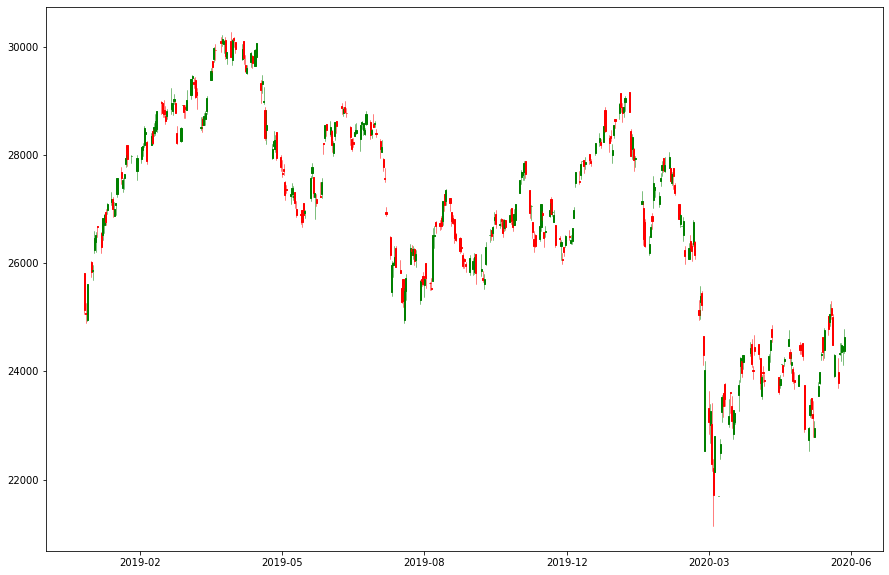

In [92]:
f1, ax = plt.subplots(figsize = (15,10))

candlestick_ohlc(ax, ohlc.values, width=0.8, colorup='green', colordown='red')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax.grid(True)
plt.show()

### Example

In [127]:
data = yf.download('^HSI','2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [128]:
data["Date"]=data.index

In [129]:
data["Volatity"]=data["Close"].pct_change().rolling(window=10).std()

In [132]:
data1=data[["Date","Open","High","Low","Close","Volume","Volatity"]].loc["2019-01-01":"2019-03-01"].copy()
ohlc=data1.copy()
ohlc["Date"] = ohlc["Date"].apply(mdates.date2num)


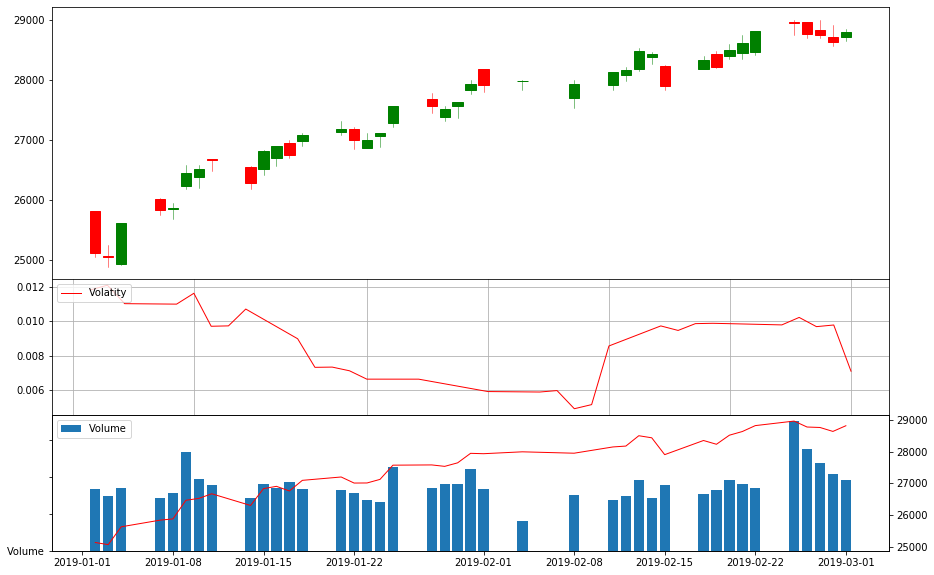

In [133]:
fig = plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((4,1), (0,0), rowspan=2, colspan=1)
candlestick_ohlc(ax1, ohlc.values, width=0.8, colorup='green', colordown='red')

#ax1.plot(data["Date"],data["Close"],color="blue",label="Close",linewidth=1)
#ax1.grid(True)

ax1r = plt.subplot2grid((4,1), (2,0), rowspan=1, colspan=1)
ax1r.plot(data1["Date"],data1["Volatity"],color="red",label="Volatity",linewidth=1)
ax1r.grid(True)

ax1v = plt.subplot2grid((4,1), (3,0), rowspan=1, colspan=1)
ax1v.axes.yaxis.set_ticklabels(["Volume"])
ax1v.grid(False)
#ax1v.set_ylim(0, data["Volume"].max())
ax1v.bar(data1["Date"],data1["Volume"],label="Volume")
ax2=ax1v.twinx()
ax2.plot(data1["Date"],data1["Close"],color="red",label="Close",linewidth=1)

plt.subplots_adjust(hspace=0)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1r.get_xticklabels(), visible=False)
#ax1.legend(loc="upper left")
ax1r.legend(loc="upper left")
ax1v.legend(loc="upper left")

plt.show()

In [94]:
from mpl_finance import candlestick2_ohlc

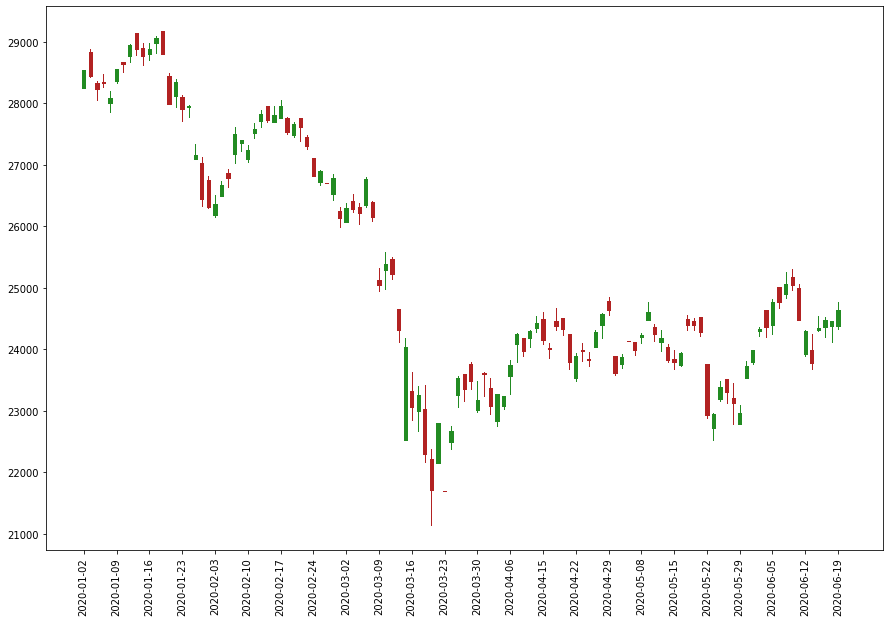

In [95]:
data=data.loc["2020-01-01":].copy()
f1, ax4 = plt.subplots(figsize = (15,10))

ax4.set_xticks(range(0, len(data.index), 5))
ax4.set_xticklabels(data.index[::5].strftime("%Y-%m-%d"))

candlestick2_ohlc(ax4, opens=data["Open"], highs=data["High"], lows=data["Low"], closes=data["Close"],
                  width=0.5, colorup="forestgreen", colordown="firebrick", alpha=1)
plt.xticks(rotation=90)
plt.show()

## Correlation analysis

## Example-plotting Dollar index, gold and HSI

In [134]:
df_dollar=yf.download("DX-Y.NYB","2019-01-01")

[*********************100%***********************]  1 of 1 completed


In [135]:
df_dollar.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-15,97.089996,97.389999,96.599998,96.680000,96.680000,0
2020-06-16,96.559998,97.250000,96.430000,96.959999,96.959999,0
2020-06-17,97.010002,97.339996,96.800003,97.160004,97.160004,0
2020-06-18,97.080002,97.580002,96.949997,97.419998,97.419998,0
2020-06-19,97.419998,97.720001,97.160004,97.620003,97.620003,0


In [98]:
df_dollar["Date"]=df_dollar.index

In [99]:
df_gold=yf.download("GC=F","2019-01-01")

[*********************100%***********************]  1 of 1 completed


In [100]:
#df_gold=yf.download("2840.HK","2019-01-01")
df_gold["Date"]=df_gold.index

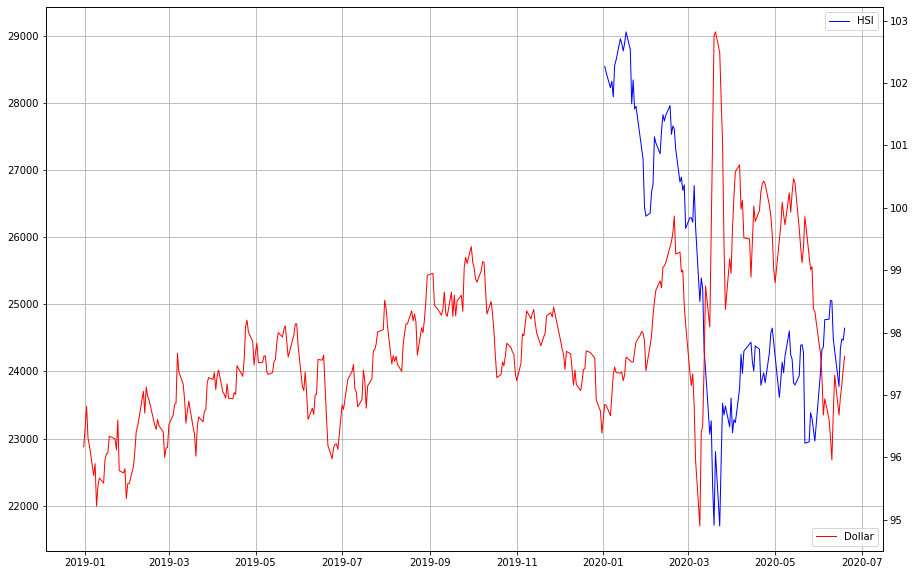

In [101]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(data["Date"],data["Close"],color="blue",label="HSI",linewidth=1)
ax1=ax.twinx()
ax1.plot(df_dollar["Date"],df_dollar["Close"],color="red",label="Dollar",linewidth=1)
ax.grid(True)
ax.legend()
ax1.legend(loc="lower right")
plt.show()

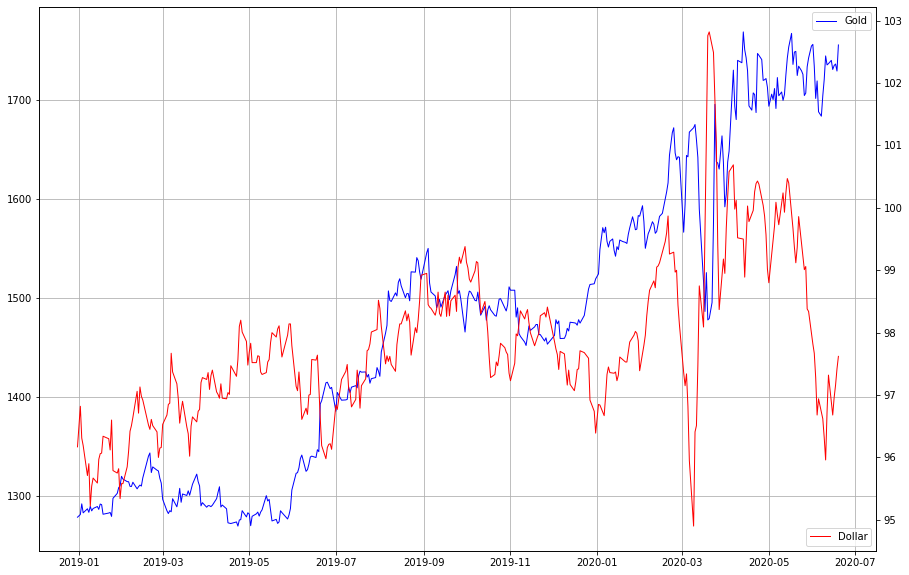

In [102]:
f1, ax = plt.subplots(figsize = (15,10))
ax.plot(df_gold["Date"],df_gold["Close"],color="blue",label="Gold",linewidth=1)
ax1=ax.twinx()
ax1.plot(df_dollar["Date"],df_dollar["Close"],color="red",label="Dollar",linewidth=1)
ax.grid(True)
ax.legend()
ax1.legend(loc="lower right")
plt.show()

In [103]:
from scipy import stats

In [104]:
df_dollar.shape

(368, 7)

In [105]:
data.shape

(116, 9)

In [106]:
df_dollar.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2018-12-31,96.400002,96.510002,96.070000,96.169998,96.169998,0,2018-12-31
2019-01-02,96.139999,96.959999,95.820000,96.820000,96.820000,0,2019-01-02
2019-01-03,96.720001,96.750000,96.209999,96.309998,96.309998,0,2019-01-03
2019-01-04,96.279999,96.610001,96.050003,96.190002,96.190002,0,2019-01-04
2019-01-07,96.160004,96.160004,95.639999,95.709999,95.709999,0,2019-01-07


In [107]:
df_dollar.index.difference(data.index)

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2019-12-23', '2019-12-26', '2019-12-27', '2019-12-30',
               '2019-12-31', '2020-01-27', '2020-01-28', '2020-04-13',
               '2020-04-30', '2020-05-01'],
              dtype='datetime64[ns]', name='Date', length=255, freq=None)

In [108]:
data.index.difference(df_dollar.index)

DatetimeIndex(['2020-01-20', '2020-02-17', '2020-05-25'], dtype='datetime64[ns]', name='Date', freq=None)

In [109]:
L1=[i for i in df_dollar.index.tolist() if i not in df_dollar.index.difference(data.index)]

In [110]:
L2=[i for i in data.index.tolist() if i not in data.index.difference(df_dollar.index)]

In [111]:
data=data.loc[L2].copy()

In [112]:
df_dollar=df_dollar.loc[L1].copy()

In [113]:
stats.pearsonr(data["Close"],df_dollar["Close"])

(-0.514067185461756, 5.757010850359035e-09)